In [1]:
#- main machine learning libraries used

import tensorflow
import tensorflow.keras as keras  
import sklearn

#- other libraries used
import os
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
from datetime import datetime
today = datetime.today()

print('latest run on:', today)

latest run on: 2022-06-01 17:00:24.623988


## check tensorflow version

In [3]:
print (tensorflow.__version__)

2.9.1


### functions(.)

## input directory

In [4]:
dataset_dir = "/Users/ehsanmos/MLP_dataset"

In [5]:
if os.path.isdir(dataset_dir) == False:
    print("dataset directory NOT found!")
else:
    print("dataset directory FOUND!")

dataset directory FOUND!


## Load input/ training dataset

before doing this section, process filter final input dataset with "check_n_filter_final_dataset"

In [6]:
in_ds = "atmmodel_april_2016_k_zero_9cams4bands_preprocessed.csv"

## check if input dataset file exists

In [7]:
in_ds_fullpath = os.path.join(dataset_dir, in_ds)
print(in_ds_fullpath)

if (not os.path.isfile(os.path.join(in_ds_fullpath))):
    raise SystemExit()
else:
    print("input dataset found!")

/Users/ehsanmos/MLP_dataset/atmmodel_april_2016_k_zero_9cams4bands_preprocessed.csv
input dataset found!


## Read in dataset and look at dataset columns

In [8]:
df_orig = pd.read_csv(in_ds_fullpath, engine='python')

In [9]:
df_orig.shape

(40775, 15)

In [10]:
df_orig.columns

Index(['firstLat', 'firstLon', 'anr', 'ang', 'anb', 'annir', 'aa', 'af', 'ba',
       'bf', 'ca', 'cf', 'da', 'df', 'rms'],
      dtype='object')

note: build an input dataset with 9 cameras to train the mlp model

In [11]:
#- build dataset with 9 cameras
excluce_columns = ['firstLat', 'firstLon', 'ang', 'anb', 'annir']
input_ds_for_training = df_orig.drop(excluce_columns, axis=1)

print('we are using %s columns in our training dataset:' %len(input_ds_for_training.columns))
print(input_ds_for_training.columns)  # columns should be only 9 cameras + rms 


we are using 10 columns in our training dataset:
Index(['anr', 'aa', 'af', 'ba', 'bf', 'ca', 'cf', 'da', 'df', 'rms'], dtype='object')


## shuffle rows of input dataset

In [12]:
from sklearn.utils import shuffle

input_ds_for_training = shuffle(input_ds_for_training)

## Split dataset to train-test parts for training algorithms
- we devided to plit our dataset to 2 parts (2-part split)
- Here we use the ‘train_test_split’ to split the data in 80:20 ratio i.e. 80% of the data will be used for training the model while 20% will be used for testing the model that is built out of it.
- note: last column should be label == rms

In [13]:
#- split data set to X and Y

X = input_ds_for_training.iloc[:, :-1] # to select up to last column of dataset OR [:, 0:3]
Y = input_ds_for_training.iloc[:, -1:] # to select last column of DF

print(X.shape)
print(Y.shape)

(40775, 9)
(40775, 1)


In [14]:
#- split dataset to train-test

from sklearn.model_selection import train_test_split

#- we use this function to split data-- from here because we are usiong SKlearn library, we change all data structures from Pandas DF to numpy
# X_train, X_test, y_train, y_test = train_test_split(X.to_numpy(), Y.to_numpy(), test_size=0.2, random_state=123) # Q- input is DF or numpy array?

test_data_size = 0.3
print("test size= %d percent" %(test_data_size*100))
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_data_size, random_state=123) # Q- input is DF or numpy array?

print("train:")
print(X_train.shape)
print(y_train.shape)
print("test:")
print(X_test.shape)
print(y_test.shape)


test size= 30 percent
train:
(28542, 9)
(28542, 1)
test:
(12233, 9)
(12233, 1)


questions:

Q- how about train-val-test (3 sections)? is this for DL?

## Feature scalling
this step should be done after splitting data to train-test

## Using MinMaxScaler method to rescale data
Q- is this important? useful? beneficial? for training mlp model?

In [15]:
#- import necessary libraries for Neural Nets
from sklearn.preprocessing import MinMaxScaler

#- fit data

scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

scaler_x.fit(X_train) # returns Fitted scaler
X_train_scaled = scaler_x.transform(X_train)  # transforms data

scaler_x.fit(X_test)
X_test_scaled = scaler_x.transform(X_test)

scaler_y.fit(y_train)
y_train_scaled = scaler_y.transform(y_train)

scaler_y.fit(y_test)
y_test_scaled = scaler_y.transform(y_test)

Check types of input dataset data structure; should be 2D arrays, or Pandas DataFrame

In [16]:
print(type(X_train_scaled))
print(type(y_train_scaled))
print(type(X_test_scaled))
print(type(y_test_scaled))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [17]:
X_train_scaled.shape

(28542, 9)

## Neural Network (Regression)

### Normalizing data as an important step

- We rescale data after we split data to train-test
- all features have the same scale to reduce bias in data 
- perform this step before splitting data into train-test split
- We normalize data using the training data

### Building the NN model
Q- how find the best architecture? for mlp?

In [18]:
##- implementation-2
##- from tensorflow import keras

import tensorflow as tf
from tensorflow.keras import layers


    
# Define Sequential model with 3 layers
mlp_model = tf.keras.Sequential(
       [
        # hidden layers
        layers.Dense(9, input_dim=9, activation="relu", kernel_initializer='normal', name="hidden-layer-1"), # input_dim=3 == input shape will build our model automatically
        layers.Dense(9, activation="relu", kernel_initializer='normal', name="hidden-layer-2"),  # name should be attached; one single word!
        layers.Dense(9, activation="relu", kernel_initializer='normal', name="hidden-layer-3"),  # name should be attached; one single word!
        #layers.Dense(9, activation="relu", kernel_initializer='normal', name="hidden-layer-4"),  # name should be attached; one single word!

        # output layer
        layers.Dense(1, activation='linear', kernel_initializer='normal', name="output-layer-SIR"),  # linear activation?
      ]
    )

mlp_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden-layer-1 (Dense)      (None, 9)                 90        
                                                                 
 hidden-layer-2 (Dense)      (None, 9)                 90        
                                                                 
 hidden-layer-3 (Dense)      (None, 9)                 90        
                                                                 
 output-layer-SIR (Dense)    (None, 1)                 10        
                                                                 
Total params: 280
Trainable params: 280
Non-trainable params: 0
_________________________________________________________________


2022-06-01 17:00:25.117477: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### plot the model

In [19]:
from tensorflow.keras.utils import plot_model

plot_model(mlp_model, to_file='model.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


### compile and train the model

In [20]:
#- compile model

mlp_model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])

In [21]:
#- train the network

train_history = mlp_model.fit(X_train_scaled, 
                              y_train_scaled, 
                              epochs=50,
                              batch_size=100, 
                              verbose=1, 
                              validation_split=0.2)

Epoch 1/50
229/229 [==============================] - 1s 2ms/step - loss: 0.0429 - mse: 0.0429 - mae: 0.1548 - val_loss: 0.0333 - val_mse: 0.0333 - val_mae: 0.1430
Epoch 2/50
229/229 [==============================] - 0s 1ms/step - loss: 0.0336 - mse: 0.0336 - mae: 0.1444 - val_loss: 0.0333 - val_mse: 0.0333 - val_mae: 0.1436
Epoch 3/50
229/229 [==============================] - 0s 1ms/step - loss: 0.0336 - mse: 0.0336 - mae: 0.1442 - val_loss: 0.0333 - val_mse: 0.0333 - val_mae: 0.1444
Epoch 4/50
229/229 [==============================] - 0s 1ms/step - loss: 0.0336 - mse: 0.0336 - mae: 0.1443 - val_loss: 0.0333 - val_mse: 0.0333 - val_mae: 0.1446
Epoch 5/50
229/229 [==============================] - 0s 1ms/step - loss: 0.0336 - mse: 0.0336 - mae: 0.1442 - val_loss: 0.0336 - val_mse: 0.0336 - val_mae: 0.1478
Epoch 6/50
229/229 [==============================] - 0s 1ms/step - loss: 0.0336 - mse: 0.0336 - mae: 0.1443 - val_loss: 0.0333 - val_mse: 0.0333 - val_mae: 0.1423
Epoch 7/50
229/2

### Training error

In [26]:
print(train_history.history.keys())
print('\n')

# print("-> model: %s" % train_model)
print("Training Loss: %.2f (units?)" % train_history.history['loss'][-1])  # will return the loss in the last training epoch
print("Training MSE: %.2f (cm^2 roughness)" % (train_history.history['mse'][-1]))
print("Training MAE: %.2f (cm roughness)" % (train_history.history['mae'][-1]))


dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])


Training Loss: 0.03 (units?)
Training MSE: 0.03 (cm^2 roughness)
Training MAE: 0.14 (cm roughness)


## Plot loss of training

dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])


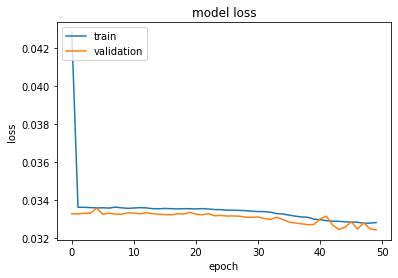

In [27]:
print(train_history.history.keys())
# "Loss" val==validation==test
plt.plot(train_history.history['loss'])
plt.plot(train_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

### Testing the NN model and report error 

In [29]:
'''Returns the loss value & metrics values for the model in test mode.
 similar to test'''

test_metrics = mlp_model.evaluate(X_test_scaled, y_test_scaled, batch_size=20, verbose=1) # Returns the loss value & metrics values for the model in test mode


612/612 [==============================] - 0s 667us/step - loss: 0.1566 - mse: 0.1566 - mae: 0.3547


[0.15663370490074158, 0.15663370490074158, 0.3547252416610718]

In [31]:
# print(test_metrics)
import math

print(test_metrics)

mse_test = test_metrics[1]
print("Test RMSE: %.2f (cm roughness)" %math.sqrt(mse_test))
print("Test MAE: %.2f (cm roughness)" %(test_metrics[2]))

[0.15663370490074158, 0.15663370490074158, 0.3547252416610718]
Test RMSE: 0.40 (cm roughness)
Test MAE: 0.35 (cm roughness)


### predict on test and scale back resutls and report them

when to use this?

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

y_pred_mlp = mlp_model.predict(X_test)  # Generates output predictions for the input samples


##- scale back the predictions
    
# y_pred_ann_original = scaler_y.inverse_transform(y_pred_ann_scaled)

# print('Test RMSE: %.2f' %math.sqrt(mean_squared_error(y_test, y_pred_ann_original))) # square root of MSE.


## save the trained model

In [ ]:
# save model and architecture to single file
model_name = "trained_model_3L9N_50epoch.h5"  # find a way to rename this online

model_fp = os.path.join(dataset_dir, model_name) 
mlp_model.save(model_fp)